# 1970

In [1]:
import pandas as pd
%pip install networkx
import networkx as nx
import matplotlib.pyplot as plt

df70 = pd.read_csv('../data/IEA_EDGAR_CO2_1970-2021_byyear.csv')
df70.head(n=10)

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


IPCC_annex       C_group_IM24_sh Country_code_A3   Name  \
0  Non-Annex_I  Rest Central America             ABW  Aruba   
1  Non-Annex_I  Rest Central America             ABW  Aruba   
2  Non-Annex_I  Rest Central America             ABW  Aruba   
3  Non-Annex_I  Rest Central America             ABW  Aruba   
4  Non-Annex_I  Rest Central America             ABW  Aruba   
5  Non-Annex_I  Rest Central America             ABW  Aruba   
6  Non-Annex_I  Rest Central America             ABW  Aruba   
7  Non-Annex_I  Rest Central America             ABW  Aruba   
8  Non-Annex_I  Rest Central America             ABW  Aruba   
9  Non-Annex_I  Rest Central America             ABW  Aruba   

  ipcc_code_2006_for_standard_report  \
0                            1.A.1.a   
1                              1.A.2   
2                              1.A.4   
3                              1.A.5   
4                              1.B.1   
5                            1.A.1.a   
6                              1.A.2   
7                            1.A.3.a   
8                      1.A.3.b_noRES   
9                            1.A.3.d   

         ipcc_code_2006_for_standard_report_name Substance fossil_bio  \
0  Main Activity Electricity and Heat Production       CO2        bio   
1      Manufacturing Industries and Construction       CO2        bio   
2                  Residential and other sectors       CO2        bio   
3                                  Non-Specified       CO2        bio   
4                                    Solid Fuels       CO2        bio   
5  Main Activity Electricity and Heat Production       CO2     fossil   
6      Manufacturing Industries and Construction       CO2     fossil   
7                                 Civil Aviation       CO2     fossil   
8            Road Transportation no resuspension       CO2     fossil   
9                         Water-borne Navigation       CO2     fossil   

      Y_1970     Y_1971  ...      Y_2012      Y_2013      Y_2014      Y_2015  \
0   0.022397   0.021412  ...    1.337603    2.371433    2.497066    2.970795   
1  12.228673  11.690942  ...    9.856529    6.886571    6.890052    7.378661   
2   0.879948   0.845336  ...    6.473158    6.021210    6.630579    5.848465   
3   0.058367   0.056820  ...    1.714841    1.721481    1.838701    2.157164   
4        NaN        NaN  ...         NaN         NaN         NaN         NaN   
5  34.724364  34.724364  ...  896.292148  846.442487  867.820889  875.169569   
6   0.476374   0.476374  ...  119.198337  110.136386  123.685510  117.320454   
7   1.565827   1.565827  ...    6.819174    5.983229    5.747611    6.215379   
8   2.567612   2.567612  ...  395.091990  400.419193  415.171728  411.024416   
9        NaN        NaN  ...   13.420570   13.498583   14.869651   15.130237   

       Y_2016      Y_2017      Y_2018      Y_2019      Y_2020      Y_2021  
0    2.438748    2.509098    3.096665    3.255611    3.378899    3.378899  
1    7.853166    9.340506    7.365402    7.718069    8.047569    8.047569  
2    6.489807    6.417006    6.410401    4.571319    7.808080    7.808080  
3    1.972983    2.068339    2.147736    2.004358    2.450398    2.450398  
4         NaN         NaN         NaN         NaN         NaN         NaN  
5  865.655963  636.499816  626.469844  644.431576  531.846511  592.536869  
6  104.141385   94.509876  104.055348  107.276590   88.780173   98.850252  
7    6.300021    6.050880    6.223453    6.416614    3.110773    3.554379  
8  395.444807  387.389194  404.347566  416.896630  344.062933  383.324830  
9   14.848308   14.434667   13.401606   13.817321   11.403374   12.704642  

[10 rows x 60 columns]

In [2]:
df70_filtered= df70.filter(['ipcc_code_2006_for_standard_report','Country_code_A3', 'Y_1970',"Name", "ipcc_code_2006_for_standard_report_name" ])
noNa=df70_filtered.dropna()
df_grouped = noNa.groupby(by=["ipcc_code_2006_for_standard_report",'Country_code_A3',"Name", "ipcc_code_2006_for_standard_report_name" ], as_index=False)['Y_1970'].sum()
df_grouped.to_csv('../csv/1970.csv')
df_grouped

ipcc_code_2006_for_standard_report Country_code_A3           Name  \
0                               1.A.1.a             ABW          Aruba   
1                               1.A.1.a             AFG    Afghanistan   
2                               1.A.1.a             AGO         Angola   
3                               1.A.1.a             AIA       Anguilla   
4                               1.A.1.a             ALB        Albania   
...                                 ...             ...            ...   
3087                                4.C             VNM       Viet Nam   
3088                                5.B             AUS      Australia   
3089                                5.B             CHN          China   
3090                                5.B             IND          India   
3091                                5.B             USA  United States   

            ipcc_code_2006_for_standard_report_name        Y_1970  
0     Main Activity Electricity and Heat Production     34.746760  
1     Main Activity Electricity and Heat Production     57.320453  
2     Main Activity Electricity and Heat Production    137.584287  
3     Main Activity Electricity and Heat Production      0.429951  
4     Main Activity Electricity and Heat Production    698.307449  
...                                             ...           ...  
3087         Incineration and Open Burning of Waste      2.849668  
3088                              Fossil fuel fires    189.200000  
3089                              Fossil fuel fires  28380.000000  
3090                              Fossil fuel fires  12430.440000  
3091                              Fossil fuel fires   4730.000000  

[3092 rows x 5 columns]

In [3]:
for idx,row in df_grouped.iterrows():
    if str(row['Y_1970'])[0]=='-':
        print(row['Y_1970'])

-6.65899e-09


In [4]:
for idx,row in df_grouped.iterrows():
    if str(row['Y_1970'])[0]=='-':
        df_grouped= df_grouped.drop(idx)
df_grouped

ipcc_code_2006_for_standard_report Country_code_A3           Name  \
0                               1.A.1.a             ABW          Aruba   
1                               1.A.1.a             AFG    Afghanistan   
2                               1.A.1.a             AGO         Angola   
3                               1.A.1.a             AIA       Anguilla   
4                               1.A.1.a             ALB        Albania   
...                                 ...             ...            ...   
3087                                4.C             VNM       Viet Nam   
3088                                5.B             AUS      Australia   
3089                                5.B             CHN          China   
3090                                5.B             IND          India   
3091                                5.B             USA  United States   

            ipcc_code_2006_for_standard_report_name        Y_1970  
0     Main Activity Electricity and Heat Production     34.746760  
1     Main Activity Electricity and Heat Production     57.320453  
2     Main Activity Electricity and Heat Production    137.584287  
3     Main Activity Electricity and Heat Production      0.429951  
4     Main Activity Electricity and Heat Production    698.307449  
...                                             ...           ...  
3087         Incineration and Open Burning of Waste      2.849668  
3088                              Fossil fuel fires    189.200000  
3089                              Fossil fuel fires  28380.000000  
3090                              Fossil fuel fires  12430.440000  
3091                              Fossil fuel fires   4730.000000  

[3091 rows x 5 columns]

In [5]:

G = nx.Graph()

# Aggiungiamo i nodi al grafo
for _, row in df_grouped.iterrows():
    country_code = row["Country_code_A3"]
    ipcc_code = row["ipcc_code_2006_for_standard_report"]
    G.add_node(country_code, label=country_code, color="red", bipartite=0, part='accountCountries',country_name=row["Name"]) 
    G.add_node(ipcc_code, label=ipcc_code, color="blue", bipartite=1, part='accountIndustries', industry_name=row['ipcc_code_2006_for_standard_report_name'])        
# Aggiungiamo gli archi al grafo con i pesi basati su "Y_1970"
for _, row in df_grouped.iterrows():
    country_code = row["Country_code_A3"]
    ipcc_code = row["ipcc_code_2006_for_standard_report"]
    weight = row["Y_1970"]
    # Se esiste già un arco tra i due nodi, aggiorna il peso
    if G.has_edge(country_code, ipcc_code):
        G[country_code][ipcc_code]['weight'] += weight
    else:
    
        G.add_edge(country_code, ipcc_code, weight=weight)


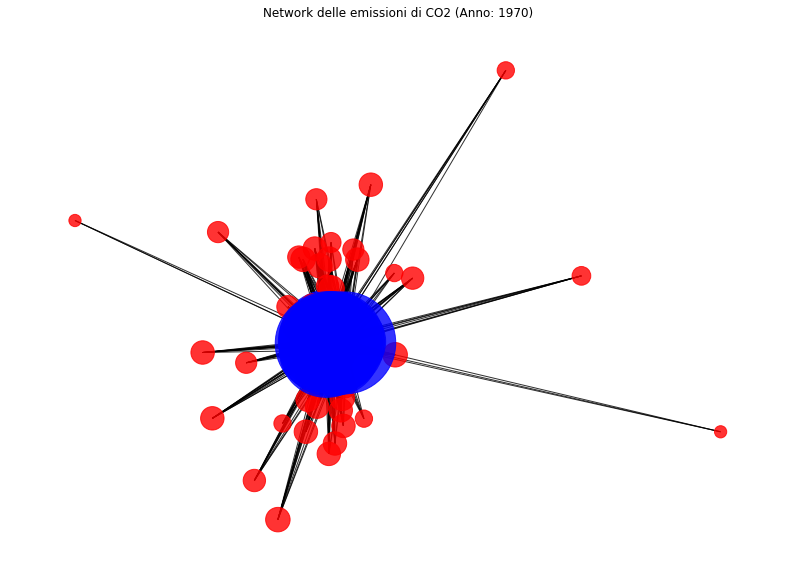

In [6]:
# Posizionamento
pos = nx.spring_layout(G, seed=42)

# Dimensione 
node_size = [v * 50 for v in dict(G.degree()).values()]

# Colori 
node_colors = [data["color"] for _, data in G.nodes(data=True)]

# Labels
node_labels = nx.get_node_attributes(G, "label")

# Peso degli archi
edge_weights = nx.get_edge_attributes(G, "weight")

# Creazione del plot del grafo
plt.figure(figsize=(14, 10))
nx.draw_networkx(G, pos, node_size=node_size, node_color=node_colors, with_labels=False, alpha=0.8)
#nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_weight="bold")
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights, font_size=8, font_color="red")

# Titolo del plot
plt.title("Network delle emissioni di CO2 (Anno: 1970)")

# Mostrare il plot del grafo
plt.axis("off")
plt.show()




In [7]:
nx.write_gexf(G, "CO2_emissions_bipartite_1970.gexf")

In [8]:
type(G)

networkx.classes.graph.Graph

In [7]:
from networkx.algorithms import bipartite
bipartite.is_bipartite(G)

True

In [10]:
print(G)

Graph with 234 nodes and 3091 edges


In [11]:
#metadata - bipartite info
list(G.nodes(data=True))[0:5]

[('ABW',
  {'label': 'ABW',
   'color': 'red',
   'bipartite': 0,
   'part': 'accountCountries',
   'country_name': 'Aruba'}),
 ('1.A.1.a',
  {'label': '1.A.1.a',
   'color': 'blue',
   'bipartite': 1,
   'part': 'accountIndustries',
   'industry_name': 'Main Activity Electricity and Heat Production'}),
 ('AFG',
  {'label': 'AFG',
   'color': 'red',
   'bipartite': 0,
   'part': 'accountCountries',
   'country_name': 'Afghanistan'}),
 ('AGO',
  {'label': 'AGO',
   'color': 'red',
   'bipartite': 0,
   'part': 'accountCountries',
   'country_name': 'Angola'}),
 ('AIA',
  {'label': 'AIA',
   'color': 'red',
   'bipartite': 0,
   'part': 'accountCountries',
   'country_name': 'Anguilla'})]

In [8]:
bottom_nodes, top_nodes = bipartite.sets(G)

# Measures to be applied

- Density (cohesion)

- Degree centrality
- Betweeness centrality
- Closeness Centrality
- Eigenvector centrality
- Load Centrality
- Laplacian centrality
- Pagerank (Birank)
- k-core (?)
- Jaccard's coefficient
- simrank(?)
- Louvain community detection

# Visualizations

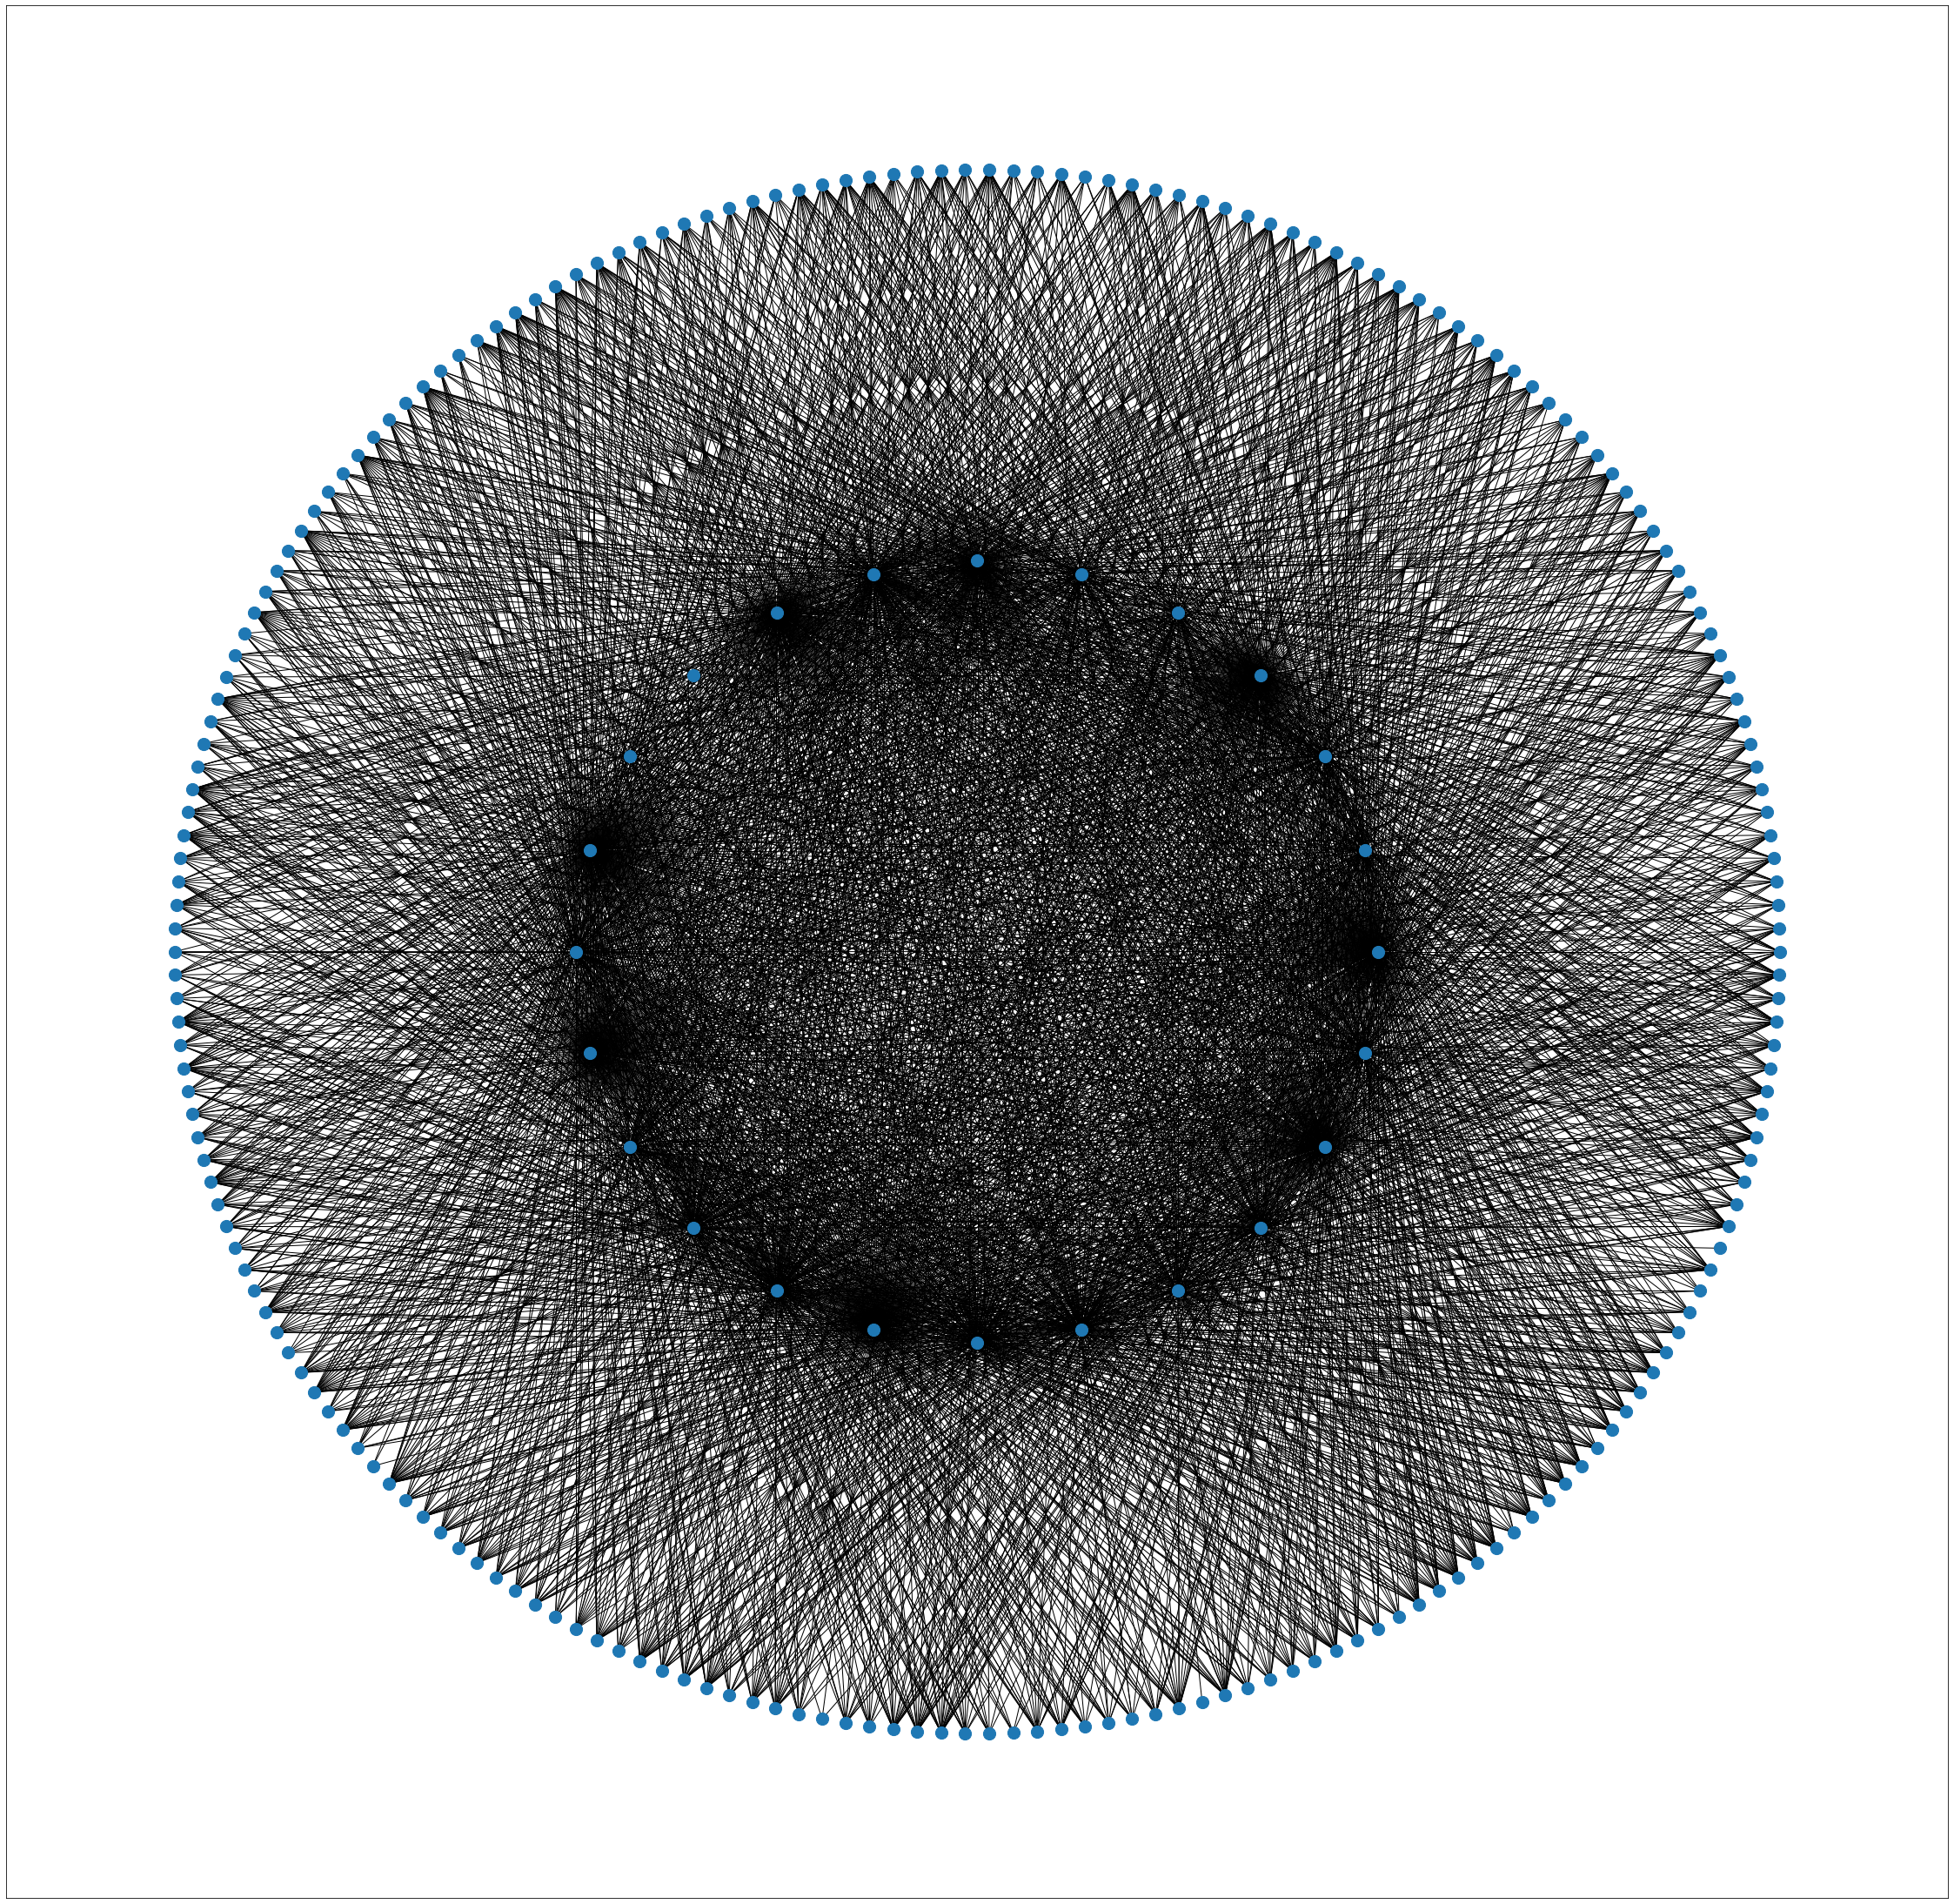

In [11]:
pos = nx.shell_layout(G, [top_nodes,bottom_nodes])
plt.figure(figsize=(40,40))
node_size=200
nx.draw_networkx(G, pos=pos, with_labels=False, node_size=node_size)

# Average weighted degree

In [14]:
weighted_deg=G.degree(nbunch=top_nodes, weight='weight')
w_series=pd.Series(dict(weighted_deg))
WDegNx=w_series.to_frame(name="nx_bipartite_weight_deg")
WDegNx.to_csv('../csv/weight_ind_deg1970.csv')
WDegNx.sort_values(by="nx_bipartite_weight_deg", ascending=False)

nx_bipartite_weight_deg
1.A.2                     4.926784e+06
1.A.4                     4.589274e+06
1.A.1.a                   3.895201e+06
1.A.3.b_noRES             1.693125e+06
1.A.1.bc                  6.874138e+05
3.C.1                     4.696228e+05
1.A.3.d                   4.437864e+05
1.A.5                     4.167294e+05
1.A.3.a                   3.351117e+05
1.B.1                     3.262623e+05
1.B.2                     3.079856e+05
2.A.1                     2.939178e+05
1.A.3.c                   2.664240e+05
2.C                       2.412386e+05
2.D                       2.376457e+05
2.B                       1.377809e+05
2.A.2                     1.161095e+05
1.A.3.e                   9.778774e+04
2.A.4                     9.242912e+04
5.B                       4.572964e+04
3.C.2                     4.348740e+04
4.C                       1.658476e+04
3.C.3                     9.090248e+03
2.A.3                     6.251441e+03

In [16]:
weighted_deg=G.degree(nbunch=bottom_nodes, weight='weight')
w_series=pd.Series(dict(weighted_deg))
CountryWDegNx=w_series.to_frame(name="nx_bipartite_weight_deg")
CountryWDegNx.to_csv('../csv/weight_country_deg1970.csv')
CountryWDegNx.sort_values(by="nx_bipartite_weight_deg", ascending=False)

nx_bipartite_weight_deg
USA             4.954520e+06
RUS             1.624575e+06
CHN             1.606950e+06
DEU             1.096970e+06
JPN             8.739406e+05
..                       ...
MDV             1.518652e+01
SHN             2.762887e+00
GRL             2.380853e+00
AIA             2.168292e+00
FRO             8.002049e-01

[210 rows x 1 columns]

# Networkx's module bipartite

In [17]:
from networkx.algorithms import bipartite

bipartite.is_bipartite_node_set(G, top_nodes)

True

In [18]:
bipartite.is_bipartite_node_set(G, bottom_nodes)

True

## Cohesion

The term “cohesion” indicates the likelihood of nodes being connected to each 
other. 

### Density
The simplest measure of cohesion is density, i.e., the ratio between the number 
of ties in the network with respect to the total number of possible ties . 
While simple, density cohesion is not very useful as an absolute measure, e.g., in 
a 10-person network, a node is likely to have ties with all 9 others. On the 
contrary, in a 1000-person network it is much more unlikely that an actor has 
anything close to 999 ties with the rest of the members.
<br>
( To avoid the issue of comparing sensibly different networks over density alone, 
we can resort to a cohesion measure on the average degree of the network. This 
is obtained by calculating the average of the degrees (number of ties) of each 
node (i.e., the row sums of the adjacency matrix) )

In [19]:
print(round(bipartite.density(G, top_nodes), 2))

0.61


In [20]:
nx.number_connected_components(G) #?

1

## Centrality
### Bipartite degree centrality
Extract 5 most central industries and Countries from bipartite centrality dataframes

In [21]:
bottom_nodes, top_nodes = bipartite.sets(G)

In [22]:

dcs = nx.bipartite.degree_centrality(G, bottom_nodes)
dcs_series=pd.Series(dcs)
BiDegCentrNx=dcs_series.to_frame(name="nx_bipartite_deg_centr")
BiDegCentrNx.sort_values(by="nx_bipartite_deg_centr", ascending=False)

nx_bipartite_deg_centr
2.A.3                        0.990476
2.D                          0.976190
1.A.3.b_noRES                0.971429
1.A.1.a                      0.971429
1.A.4                        0.961905
...                               ...
FRO                          0.125000
1.A.3.e                      0.119048
SEA                          0.041667
AIR                          0.041667
5.B                          0.019048

[234 rows x 1 columns]

In [23]:
ind=dict()
country=dict()
for node in dcs:
    if node in top_nodes:        
        ind[node]=dcs[node]
    elif node in bottom_nodes:
        country[node]=dcs[node]

In [24]:
ind_series=pd.Series(ind)

IndBiDegCentrNx=ind_series.to_frame(name="nx_bipartite_deg_centr")
IndBiDegCentrNx.sort_values(by="nx_bipartite_deg_centr", ascending=False).head(n=10)

nx_bipartite_deg_centr
2.A.3                        0.990476
2.D                          0.976190
1.A.3.b_noRES                0.971429
1.A.1.a                      0.971429
1.A.4                        0.961905
1.A.2                        0.942857
3.C.1                        0.900000
1.B.2                        0.842857
1.A.5                        0.695238
3.C.3                        0.680952

In [25]:
series=pd.Series(country)

CountryBiDegCentrNx=series.to_frame(name="nx_bipartite_deg_centr")
CountryBiDegCentrNx.sort_values(by="nx_bipartite_deg_centr", ascending=False).head(n=10)

nx_bipartite_deg_centr
USA                0.958333
AUS                0.958333
ESP                0.958333
JPN                0.958333
ITA                0.958333
EGY                0.916667
IND                0.916667
DEU                0.916667
CHN                0.916667
PRT                0.916667

In [26]:
#BiDegCentrNx.to_csv("../csv/degree_centr_nx_1970.csv")
CountryBiDegCentrNx.to_csv("../csv/degree_centr_country1970.csv")
IndBiDegCentrNx.to_csv('../csv/degree_centr_ind1970.csv')

### Bipartite betweeness

In [27]:
beetw = nx.bipartite.betweenness_centrality(G, bottom_nodes)
bet_series=pd.Series(beetw)
BetwCentrNx=bet_series.to_frame(name="nx_bipartite_betw_centr")
BetwCentrNx.sort_values(by="nx_bipartite_betw_centr", ascending=False)

nx_bipartite_betw_centr
2.A.3                         0.090949
2.D                           0.084200
1.A.1.a                       0.081150
1.A.3.b_noRES                 0.080932
1.A.4                         0.079891
...                                ...
FRO                           0.000009
GRL                           0.000009
GNQ                           0.000008
AIR                           0.000000
SEA                           0.000000

[234 rows x 1 columns]

In [28]:
ind=dict()
country=dict()
for node in beetw:
    if node in top_nodes:        
        ind[node]=beetw[node]
    elif node in bottom_nodes:
        country[node]=beetw[node]

In [29]:
ind_series=pd.Series(ind)

IndBetCentrNx=ind_series.to_frame(name="nx_bipartite_bet_centr")
IndBetCentrNx.sort_values(by="nx_bipartite_bet_centr", ascending=False).head(n=10)

nx_bipartite_bet_centr
2.A.3                        0.090949
2.D                          0.084200
1.A.1.a                      0.081150
1.A.3.b_noRES                0.080932
1.A.4                        0.079891
1.A.2                        0.074184
3.C.1                        0.068153
1.B.2                        0.055728
1.A.5                        0.039238
3.C.3                        0.034155

In [31]:
c_series=pd.Series(country)

cBetCentrNx=c_series.to_frame(name="nx_bipartite_bet_centr")
cBetCentrNx.sort_values(by="nx_bipartite_bet_centr", ascending=False).head(n=10)

nx_bipartite_bet_centr
USA                0.003424
AUS                0.003214
CHN                0.003087
IND                0.003034
ESP                0.001309
JPN                0.001309
ITA                0.001309
AUT                0.001214
ARG                0.001214
RUS                0.001208

In [32]:
IndBetCentrNx.to_csv('../csv/beetw_ind1970.csv')
cBetCentrNx.to_csv('../csv/beetw_country1970.csv')

### Closeness centrality

In [33]:
close = nx.bipartite.closeness_centrality(G, bottom_nodes)
cl_series=pd.Series(close)
CloseCentrNx=cl_series.to_frame(name="nx_bipartite_closen_centr")
CloseCentrNx.sort_values(by="nx_bipartite_closen_centr", ascending=False)

nx_bipartite_closen_centr
JPN                       0.995495
USA                       0.995495
ITA                       0.995495
AUS                       0.995495
ESP                       0.995495
...                            ...
2.C                       0.496124
1.A.3.d                   0.496124
1.A.3.c                   0.472325
1.A.3.e                   0.408946
5.B                       0.383234

[234 rows x 1 columns]

In [35]:
ind=dict()
country=dict()
for node in close:
    if node in top_nodes:        
        ind[node]=close[node]
    elif node in bottom_nodes:
        country[node]=close[node]

In [37]:
ind_series=pd.Series(ind)

IndBetCentrNx=ind_series.to_frame(name="nx_bipartite_close_centr")
IndBetCentrNx.to_csv('../csv/close_ind1970.csv')
IndBetCentrNx.sort_values(by="nx_bipartite_close_centr", ascending=False).head(n=10)

nx_bipartite_close_centr
2.A.3                          0.984615
2.D                            0.962406
1.A.3.b_noRES                  0.955224
1.A.1.a                        0.955224
1.A.4                          0.941176
1.A.2                          0.914286
3.C.1                          0.859060
1.B.2                          0.795031
1.A.5                          0.666667
3.C.3                          0.656410

In [38]:
series=pd.Series(country)

CountryBiDegCentrNx=series.to_frame(name="nx_bipartite_close_centr")
CountryBiDegCentrNx.to_csv('../csv/close_country2019.csv')
CountryBiDegCentrNx.sort_values(by="nx_bipartite_close_centr", ascending=False).head(n=10)

nx_bipartite_close_centr
USA                  0.995495
JPN                  0.995495
ESP                  0.995495
ITA                  0.995495
AUS                  0.995495
NOR                  0.991031
CHE                  0.991031
FIN                  0.991031
DEU                  0.991031
SWE                  0.991031

In [31]:
nx.bipartite.maximum_matching(G, top_nodes=top_nodes)           #?

{'4.C': 'ALB',
 '1.A.4': 'ABW',
 '1.B.1': 'AFG',
 '1.A.3.a': 'AIR',
 '3.C.3': 'ARE',
 '1.B.2': 'AGO',
 '1.A.3.d': 'ARG',
 '1.A.2': 'AIA',
 '3.C.2': 'ARM',
 '5.B': 'AUS',
 '2.D': 'ANT',
 '1.A.1.bc': 'AUT',
 '3.C.1': 'ATG',
 '1.A.5': 'AZE',
 '1.A.3.b_noRES': 'BDI',
 '2.A.1': 'BEL',
 '1.A.3.c': 'BGD',
 '1.A.1.a': 'BFA',
 '2.A.3': 'BEN',
 '2.A.4': 'BGR',
 '1.A.3.e': 'BLR',
 '2.A.2': 'BHS',
 '2.C': 'BIH',
 '2.B': 'BRA',
 'BLR': '1.A.3.e',
 'AFG': '1.B.1',
 'AUS': '5.B',
 'ANT': '2.D',
 'ABW': '1.A.4',
 'BGR': '2.A.4',
 'ATG': '3.C.1',
 'BEN': '2.A.3',
 'AIR': '1.A.3.a',
 'ALB': '4.C',
 'AZE': '1.A.5',
 'AUT': '1.A.1.bc',
 'AGO': '1.B.2',
 'ARM': '3.C.2',
 'ARE': '3.C.3',
 'BEL': '2.A.1',
 'AIA': '1.A.2',
 'ARG': '1.A.3.d',
 'BRA': '2.B',
 'BDI': '1.A.3.b_noRES',
 'BFA': '1.A.1.a',
 'BGD': '1.A.3.c',
 'BHS': '2.A.2',
 'BIH': '2.C'}

# Laplacian

In [9]:
"""
Laplacian centrality measures.
"""
import networkx as nx

__all__ = ["laplacian_centrality"]


def laplacian_centrality(
    G, normalized=True, nodelist=None, weight="weight", walk_type=None, alpha=0.95
):
    r"""Compute the Laplacian centrality for nodes in the graph `G`.

    The Laplacian Centrality of a node ``i`` is measured by the drop in the
    Laplacian Energy after deleting node ``i`` from the graph. The Laplacian Energy
    is the sum of the squared eigenvalues of a graph's Laplacian matrix.

    .. math::

        C_L(u_i,G) = \frac{(\Delta E)_i}{E_L (G)} = \frac{E_L (G)-E_L (G_i)}{E_L (G)}

        E_L (G) = \sum_{i=0}^n \lambda_i^2

    Where $E_L (G)$ is the Laplacian energy of graph `G`,
    E_L (G_i) is the Laplacian energy of graph `G` after deleting node ``i``
    and $\lambda_i$ are the eigenvalues of `G`'s Laplacian matrix.
    This formula shows the normalized value. Without normalization,
    the numerator on the right side is returned.

    Parameters
    ----------
    G : graph
        A networkx graph

    normalized : bool (default = True)
        If True the centrality score is scaled so the sum over all nodes is 1.
        If False the centrality score for each node is the drop in Laplacian
        energy when that node is removed.

    nodelist : list, optional (default = None)
        The rows and columns are ordered according to the nodes in nodelist.
        If nodelist is None, then the ordering is produced by G.nodes().

    weight: string or None, optional (default=`weight`)
        Optional parameter `weight` to compute the Laplacian matrix.
        The edge data key used to compute each value in the matrix.
        If None, then each edge has weight 1.

    walk_type : string or None, optional (default=None)
        Optional parameter `walk_type` used when calling
        :func:`directed_laplacian_matrix <networkx.directed_laplacian_matrix>`.
        If None, the transition matrix is selected depending on the properties
        of the graph. Otherwise can be `random`, `lazy`, or `pagerank`.

    alpha : real (default = 0.95)
        Optional parameter `alpha` used when calling
        :func:`directed_laplacian_matrix <networkx.directed_laplacian_matrix>`.
        (1 - alpha) is the teleportation probability used with pagerank.

    Returns
    -------
    nodes : dictionary
       Dictionary of nodes with Laplacian centrality as the value.

    Examples
    --------
    >>> G = nx.Graph()
    >>> edges = [(0, 1, 4), (0, 2, 2), (2, 1, 1), (1, 3, 2), (1, 4, 2), (4, 5, 1)]
    >>> G.add_weighted_edges_from(edges)
    >>> sorted((v, f"{c:0.2f}") for v, c in laplacian_centrality(G).items())
    [(0, '0.70'), (1, '0.90'), (2, '0.28'), (3, '0.22'), (4, '0.26'), (5, '0.04')]

    Notes
    -----
    The algorithm is implemented based on [1]_ with an extension to directed graphs
    using the ``directed_laplacian_matrix`` function.

    Raises
    ------
    NetworkXPointlessConcept
        If the graph `G` is the null graph.

    References
    ----------
    .. [1] Qi, X., Fuller, E., Wu, Q., Wu, Y., and Zhang, C.-Q. (2012).
       Laplacian centrality: A new centrality measure for weighted networks.
       Information Sciences, 194:240-253.
       https://math.wvu.edu/~cqzhang/Publication-files/my-paper/INS-2012-Laplacian-W.pdf

    See Also
    --------
    directed_laplacian_matrix
    laplacian_matrix
    """
    import numpy as np
    import scipy as sp
    import scipy.linalg  # call as sp.linalg

    if len(G) == 0:
        raise nx.NetworkXPointlessConcept("null graph has no centrality defined")

    if nodelist != None:
        nodeset = set(G.nbunch_iter(nodelist))
        if len(nodeset) != len(nodelist):
            raise nx.NetworkXError("nodelist has duplicate nodes or nodes not in G")
        nodes = nodelist + [n for n in G if n not in nodeset]
    else:
        nodelist = nodes = list(G)

    if G.is_directed():
        lap_matrix = nx.directed_laplacian_matrix(G, nodes, weight, walk_type, alpha)
    else:
        lap_matrix = nx.laplacian_matrix(G, nodes, weight).toarray()

    full_energy = np.power(sp.linalg.eigh(lap_matrix, eigvals_only=True), 2).sum()

    # calculate laplacian centrality
    laplace_centralities_dict = {}
    for i, node in enumerate(nodelist):
        # remove row and col i from lap_matrix
        all_but_i = list(np.arange(lap_matrix.shape[0]))
        all_but_i.remove(i)
        A_2 = lap_matrix[all_but_i, :][:, all_but_i]

        # Adjust diagonal for removed row
        new_diag = lap_matrix.diagonal() - abs(lap_matrix[:, i])
        np.fill_diagonal(A_2, new_diag[all_but_i])

        new_energy = np.power(sp.linalg.eigh(A_2, eigvals_only=True), 2).sum()
        lapl_cent = full_energy - new_energy
        if normalized:
            lapl_cent = lapl_cent / full_energy

        laplace_centralities_dict[node] = lapl_cent

    return laplace_centralities_dict 

['USA', '1.A.2', '1.A.4', '1.A.1.a', 'CHN']

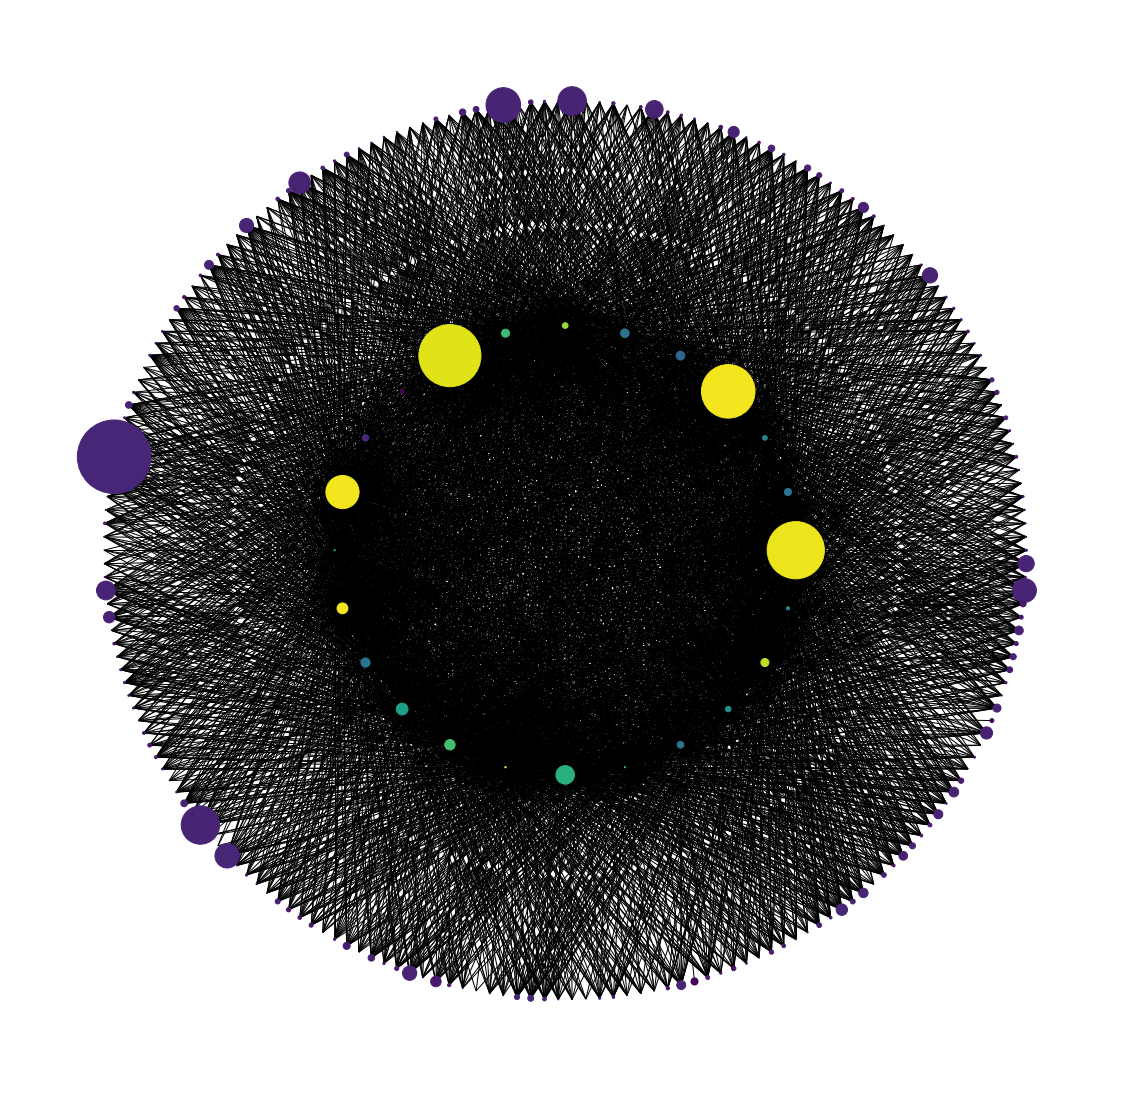

In [13]:
LaplCentr=laplacian_centrality(G, weight='weight')
node_color = [20000.0 * G.degree(v) for v in G]
node_size = [v * 10000 for v in LaplCentr.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, with_labels=False,
node_color=node_color,
node_size=node_size)
plt.axis('off')
sorted(LaplCentr, key=LaplCentr.get, reverse=True)[:5]

In [16]:
ind_lapl=laplacian_centrality(G, nodelist=list(top_nodes),weight="weight")
lapl_series=pd.Series(ind_lapl)
LaplCentrNxInd=lapl_series.to_frame(name="nx_lapl_centr_ind")
LaplCentrNxInd.to_csv('../csv/lapl_ind1970.csv')
LaplCentrNxInd.sort_values(by="nx_lapl_centr_ind", ascending=False).head(n=10)

nx_lapl_centr_ind
1.A.2                   0.385386
1.A.4                   0.327144
1.A.1.a                 0.286387
1.A.3.b_noRES           0.109801
1.A.1.bc                0.034442
1.A.3.a                 0.013727
2.D                     0.011676
1.A.5                   0.010824
1.B.1                   0.008417
1.A.3.c                 0.007750

In [118]:
countryLapl=laplacian_centrality(G, nodelist=list(bottom_nodes),weight="weight")
lapl_series=pd.Series(countryLapl)
LaplCentrNx=lapl_series.to_frame(name="nx_lapl_centr_country")
LaplCentrNx.to_csv('../csv/lapl_country1970.csv')
LaplCentrNx.sort_values(by="nx_lapl_centr_country", ascending=False).head(n=10)

nx_lapl_centr_country
USA               0.541067
CHN               0.146586
RUS               0.119443
DEU               0.081275
JPN               0.059371
IND               0.056559
GBR               0.047003
FRA               0.035299
UKR               0.031006
CAN               0.026223

## Byrank measures

In [19]:
%pip install birankpy

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


### Cleaning of the data
filter the dataframe selecting only interested columns and rows

In [20]:
import birankpy
bn = birankpy.BipartiteNetwork()

bn.set_edgelist(df_grouped,  top_col='ipcc_code_2006_for_standard_report', bottom_col='Country_code_A3', weight_col='Y_1970')


In [21]:
HITSdf, _ = bn.generate_birank(normalizer='HITS')
HITSdf.to_csv('../csv/hits_ind1970.csv')
HITSdf.sort_values(by='ipcc_code_2006_for_standard_report_birank', ascending=False).head()

ipcc_code_2006_for_standard_report  \
2                              1.A.2   
0                            1.A.1.a   
8                              1.A.4   
4                      1.A.3.b_noRES   
1                           1.A.1.bc   

   ipcc_code_2006_for_standard_report_birank  
2                                   0.252640  
0                                   0.223056  
8                                   0.211536  
4                                   0.129025  
1                                   0.048418

In [46]:
br_df, _ = bn.generate_birank(normalizer='BiRank')
br_df.sort_values(by='ipcc_code_2006_for_standard_report_birank', ascending=False).head()

ipcc_code_2006_for_standard_report  \
2                              1.A.2   
8                              1.A.4   
0                            1.A.1.a   
4                      1.A.3.b_noRES   
6                            1.A.3.d   

   ipcc_code_2006_for_standard_report_birank  
2                                   0.044459  
8                                   0.043219  
0                                   0.039919  
4                                   0.028558  
6                                   0.021551

In [47]:

br_df.to_csv('../csv/birank_ind1970.csv')

### Countries

In [39]:
import birankpy
countryfirst_bn = birankpy.BipartiteNetwork()

countryfirst_bn.set_edgelist(df_grouped, top_col='Country_code_A3', bottom_col='ipcc_code_2006_for_standard_report',  weight_col='Y_1970')

In [49]:
HITSdf, _ = countryfirst_bn.generate_birank(normalizer='HITS')
HITSdf.to_csv('../csv/hits_country1970.csv')
HITSdf.sort_values(by='Country_code_A3_birank', ascending=False).head()

Country_code_A3  Country_code_A3_birank
192             USA                0.260087
34              CHN                0.094940
155             RUS                0.081485
48              DEU                0.060663
95              JPN                0.046426

In [50]:
birankdf, _ = countryfirst_bn.generate_birank(normalizer='BiRank')
birankdf.to_csv('../csv/birank_country1970.csv')
birankdf.sort_values(by='Country_code_A3_birank', ascending=False).head()

Country_code_A3  Country_code_A3_birank
192             USA                0.042502
155             RUS                0.025506
34              CHN                0.024162
48              DEU                0.020130
95              JPN                0.018808

### Unipartite projection

In [40]:
country_un = countryfirst_bn.unipartite_projection(on='Country_code_A3')
country_projected_pagerank_df = country_un.generate_pagerank()
country_projected_pagerank_df.to_csv('../csv/pagerank_country1970.csv')
country_projected_pagerank_df.sort_values(by='pagerank', ascending=False).head()

Country_code_A3  pagerank
192             USA  0.179652
34              CHN  0.084288
155             RUS  0.067034
48              DEU  0.053451
95              JPN  0.040543

In [52]:
un = bn.unipartite_projection(on='ipcc_code_2006_for_standard_report_birank')
projected_pagerank_df = un.generate_pagerank()
projected_pagerank_df.to_csv('../csv/pagerank_ind1970.csv')
projected_pagerank_df.sort_values(by='pagerank', ascending=False).head()

ipcc_code_2006_for_standard_report  pagerank
2                              1.A.2  0.206766
0                            1.A.1.a  0.187641
8                              1.A.4  0.173387
4                      1.A.3.b_noRES  0.120667
1                           1.A.1.bc  0.053649

# Assortativity

In [53]:
nx.degree_assortativity_coefficient(G, weight='weight')

-0.16855259175926215

# Projection

In [128]:
proj = bipartite.projected_graph(G, bottom_nodes)
proj_ind= bipartite.projected_graph(G, top_nodes)
weight_proj_B = bipartite.weighted_projected_graph(G, bottom_nodes)
#weight_proj_B.edges(data=True)

In [55]:
print(proj, proj_ind)

Graph with 210 nodes and 21723 edges Graph with 24 nodes and 276 edges


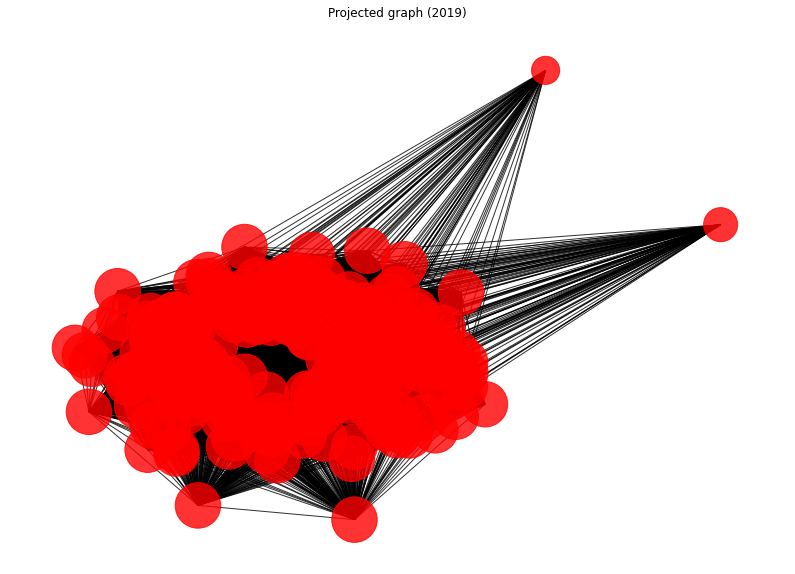

In [63]:
# Posizionamento dei nodi nel plot del grafo
pos = nx.spring_layout(weight_proj_B, seed=42)

# Dimensione dei nodi proporzionale al grado
node_size = [v * 10 for v in dict(weight_proj_B.degree()).values()]

# Colori dei nodi
node_colors = [data["color"] for _, data in weight_proj_B.nodes(data=True)]

# Etichette dei nodi
node_labels = nx.get_node_attributes(weight_proj_B, "label")

# Peso degli archi
edge_weights = nx.get_edge_attributes(weight_proj_B, "weight")

# Creazione del plot del grafo
plt.figure(figsize=(14, 10))
nx.draw_networkx(weight_proj_B, pos, node_size=node_size, node_color=node_colors, with_labels=False, alpha=0.8)
#nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_weight="bold")
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights, font_size=8, font_color="red")

# Titolo del plot
plt.title("Projected graph (2019)")

# Mostrare il plot del grafo
plt.axis("off")
plt.show()

In [129]:
weight_proj_I = bipartite.weighted_projected_graph(G, top_nodes)
#weight_proj_I.edges(data=True)

In [57]:
print('Avg. clustering coefficient:', nx.average_clustering(weight_proj_B))
print('Avg. clustering coefficient:', nx.average_clustering(weight_proj_I))

Avg. clustering coefficient: 0.9953988697123723
Avg. clustering coefficient: 1.0


In [108]:
print('Avg. clustering coefficient:', nx.average_clustering(proj))

Avg. clustering coefficient: 0.9953988697123723


In [109]:
print('Assortativity', nx.degree_assortativity_coefficient(proj))

Assortativity -0.01598464511908578


# Periphery

In [114]:
len(nx.periphery(G))

155

In [58]:
len(nx.periphery(weight_proj_B))

155

# Cores

In [121]:
core_g=nx.k_core(G)
print(core_g)

Graph with 55 nodes and 705 edges


In [59]:
core_g=nx.k_core(weight_proj_B)
print(core_g)

Graph with 208 nodes and 21528 edges


In [60]:
dc = nx.degree(weight_proj_B)
dcv = [ v for k, v in dc]
max(dcv)

209

In [61]:
k = 209
while True:
  kg = nx.k_core(weight_proj_B, k)
  if kg.number_of_nodes() > 0:
    break
  else:
    k = k -1

In [62]:
print("Largest core in countries graph is {} ".format(k))

Largest core in countries graph is 207 


# assortativity

In [118]:
nx.degree_pearson_correlation_coefficient(G, weight='weight')

-0.16855259175926182

degree distrib

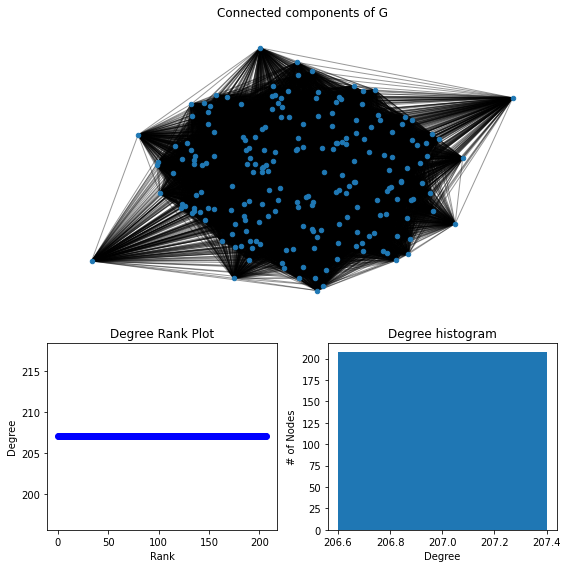

In [64]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in kg.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = core_g.subgraph(sorted(nx.connected_components(core_g), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

# Cores

In [66]:
core_g=nx.k_core(G)
print(core_g)

Graph with 55 nodes and 705 edges


In [67]:
dc = nx.degree(proj)
dcv = [ v for k, v in dc]
max(dcv)

209

In [68]:
k = 209
while True:
  kg = nx.k_core(proj, k)
  if kg.number_of_nodes() > 0:
    break
  else:
    k = k -1

In [69]:
print("Largest core in countries graph is {} ".format(k))

Largest core in countries graph is 207 


# Simrank 

In [70]:
sr19= nx.simrank_similarity(G)
sr19Data = pd.DataFrame(data=sr19)
sr19Data

ABW   1.A.1.a       AFG       AGO       AIA       ALB       ANT  \
ABW      1.000000  0.000000  0.495213  0.446001  0.522395  0.521725  0.500705   
1.A.1.a  0.000000  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
AFG      0.495213  0.000000  1.000000  0.479795  0.474172  0.484035  0.460853   
AGO      0.446001  0.000000  0.479795  1.000000  0.465081  0.507451  0.460720   
AIA      0.522395  0.000000  0.474172  0.465081  1.000000  0.523892  0.541505   
...           ...       ...       ...       ...       ...       ...       ...   
3.C.1    0.000000  0.489800  0.000000  0.000000  0.000000  0.000000  0.000000   
3.C.2    0.000000  0.522508  0.000000  0.000000  0.000000  0.000000  0.000000   
3.C.3    0.000000  0.501794  0.000000  0.000000  0.000000  0.000000  0.000000   
4.C      0.000000  0.511552  0.000000  0.000000  0.000000  0.000000  0.000000   
5.B      0.000000  0.512195  0.000000  0.000000  0.000000  0.000000  0.000000   

              ARE       ARG       ARM  ...       GRL     2.A.4       2.B  \
ABW      0.411345  0.509778  0.523953  ...  0.486492  0.000000  0.000000   
1.A.1.a  0.000000  0.000000  0.000000  ...  0.000000  0.532352  0.532773   
AFG      0.445796  0.476313  0.473564  ...  0.458352  0.000000  0.000000   
AGO      0.553594  0.478733  0.507518  ...  0.448555  0.000000  0.000000   
AIA      0.420371  0.554719  0.542491  ...  0.508567  0.000000  0.000000   
...           ...       ...       ...  ...       ...       ...       ...   
3.C.1    0.000000  0.000000  0.000000  ...  0.000000  0.488047  0.488818   
3.C.2    0.000000  0.000000  0.000000  ...  0.000000  0.515842  0.515195   
3.C.3    0.000000  0.000000  0.000000  ...  0.000000  0.500817  0.500618   
4.C      0.000000  0.000000  0.000000  ...  0.000000  0.521166  0.520202   
5.B      0.000000  0.000000  0.000000  ...  0.000000  0.510275  0.513195   

              2.C       2.D     3.C.1     3.C.2     3.C.3       4.C       5.B  
ABW      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1.A.1.a  0.514430  0.555290  0.489800  0.522508  0.501794  0.511552  0.512195  
AFG      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
AGO      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
AIA      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
...           ...       ...       ...       ...       ...       ...       ...  
3.C.1    0.489657  0.492574  1.000000  0.495676  0.509974  0.480646  0.534939  
3.C.2    0.506598  0.530082  0.495676  1.000000  0.502251  0.494893  0.515122  
3.C.3    0.500288  0.504546  0.509974  0.502251  1.000000  0.492597  0.558605  
4.C      0.511494  0.500018  0.480646  0.494893  0.492597  1.000000  0.493131  
5.B      0.517600  0.517347  0.534939  0.515122  0.558605  0.493131  1.000000  

[234 rows x 234 columns]

In [71]:
sr19p= nx.simrank_similarity(weight_proj_B)
sr19Datap = pd.DataFrame(data=sr19p)
sr19Datap

CYM       BEN       BIH       ERI       SDN       UGA       GIN  \
CYM  1.000000  0.042279  0.042287  0.042276  0.042280  0.042297  0.042297   
BEN  0.042279  1.000000  0.042352  0.042316  0.042326  0.042324  0.042306   
BIH  0.042287  0.042352  1.000000  0.042413  0.042444  0.042425  0.042368   
ERI  0.042276  0.042316  0.042413  1.000000  0.042391  0.042368  0.042339   
SDN  0.042280  0.042326  0.042444  0.042391  1.000000  0.042388  0.042352   
..        ...       ...       ...       ...       ...       ...       ...   
TCD  0.042303  0.042309  0.042371  0.042342  0.042356  0.042353  0.042336   
TTO  0.042291  0.042325  0.042452  0.042385  0.042408  0.042392  0.042354   
CHL  0.042293  0.042358  0.042545  0.042430  0.042464  0.042439  0.042382   
HTI  0.042274  0.042328  0.042454  0.042396  0.042421  0.042390  0.042351   
BFA  0.042302  0.042300  0.042342  0.042323  0.042333  0.042335  0.042324   

          MLI       GRC       VGB  ...       ISL       FJI       CPV  \
CYM  0.042293  0.042301  0.042304  ...  0.042291  0.042296  0.042302   
BEN  0.042305  0.042358  0.042279  ...  0.042329  0.042313  0.042289   
BIH  0.042370  0.042548  0.042287  ...  0.042466  0.042392  0.042324   
ERI  0.042330  0.042425  0.042276  ...  0.042367  0.042344  0.042307   
SDN  0.042344  0.042460  0.042280  ...  0.042390  0.042360  0.042316   
..        ...       ...       ...  ...       ...       ...       ...   
TCD  0.042329  0.042388  0.042303  ...  0.042346  0.042338  0.042320   
TTO  0.042350  0.042472  0.042291  ...  0.042404  0.042366  0.042323   
CHL  0.042382  0.042569  0.042293  ...  0.042479  0.042406  0.042335   
HTI  0.042343  0.042468  0.042274  ...  0.042395  0.042360  0.042311   
BFA  0.042316  0.042357  0.042302  ...  0.042325  0.042324  0.042313   

          NIC       ABW       TCD       TTO       CHL       HTI       BFA  
CYM  0.042293  0.042304  0.042303  0.042291  0.042293  0.042274  0.042302  
BEN  0.042334  0.042279  0.042309  0.042325  0.042358  0.042328  0.042300  
BIH  0.042466  0.042287  0.042371  0.042452  0.042545  0.042454  0.042342  
ERI  0.042396  0.042276  0.042342  0.042385  0.042430  0.042396  0.042323  
SDN  0.042421  0.042280  0.042356  0.042408  0.042464  0.042421  0.042333  
..        ...       ...       ...       ...       ...       ...       ...  
TCD  0.042368  0.042303  1.000000  0.042359  0.042387  0.042354  0.042329  
TTO  0.042424  0.042291  0.042359  1.000000  0.042474  0.042413  0.042336  
CHL  0.042489  0.042293  0.042387  0.042474  1.000000  0.042474  0.042355  
HTI  0.042428  0.042274  0.042354  0.042413  0.042474  1.000000  0.042330  
BFA  0.042343  0.042302  0.042329  0.042336  0.042355  0.042330  1.000000  

[210 rows x 210 columns]

In [72]:
def get_top_similar_countries(simrank_result):
    keys_to_remove = []
    
    # Iterate over the keys (nodes) in sr19['CHN']
    for c in simrank_result:
        if simrank_result[c] == 1:
            keys_to_remove.append(c)

    # Remove the keys from the dictionary
    for key in keys_to_remove:
        del simrank_result[key]

    sorted_countries = sorted(simrank_result.items(), key=lambda x: x[1], reverse=True)
    top_n = 5
    #most_similar_countries = sorted_countries[:top_n]
    #for country, simrank_score in most_similar_countries:
        #print(f"{country}: {simrank_score}")
    # Select the top N similar countries
    top_similar = sorted_countries[:top_n]
    
    # Create a Pandas Series with index as country names and values as SimRank scores
    similar_series = pd.Series({country: score for country, score in top_similar})
    
    return similar_series

In [73]:
import pandas as pd

# Your original DataFrame (replace this with your actual DataFrame)
your_original_df = pd.DataFrame({
 #'CHN':[], 'USA':[], 'RUS':[],'JPN':[], 'IND':[],
    # Other columns in your DataFrame
})
your_original_df
# Example usage for reference country 'CHN'
Ind = get_top_similar_countries(sr19['RUS'])
chi= get_top_similar_countries(sr19['CHN'])
indi= get_top_similar_countries(sr19['IND'])
jpn= get_top_similar_countries(sr19['JPN'])
usa= get_top_similar_countries(sr19['USA'])
# Join the 'Ind' Series with your original DataFrame
result_df = pd.concat([your_original_df, Ind.rename('RUS')], axis=1)
result_df = pd.concat([result_df, chi.rename('CHN')], axis=1)
result_df = pd.concat([result_df, indi.rename('IND')], axis=1)
result_df = pd.concat([result_df, usa.rename('USA')], axis=1)

# Print the resulting DataFrame
result_df=result_df.fillna('-')
result_df.to_csv('../csv/simrank_top_similar1970.csv')
print(result_df)


          RUS       CHN       IND       USA
EST  0.585784         -         -         -
MLT  0.576497         -         -         -
GIB  0.571601         -         -         -
POL  0.569405         -         -         -
HKG  0.567793         -         -         -
BTN         -  0.681541  0.615443         -
BDI         -   0.68133   0.61942         -
RWA         -  0.681156  0.618652         -
ETH         -  0.681039  0.616202         -
UGA         -  0.678337  0.617324         -
LUX         -         -         -  0.573739
MUS         -         -         -  0.573646
SWZ         -         -         -  0.569114
AZE         -         -         -  0.568904
FJI         -         -         -  0.568557


In [74]:
import itertools

# List of 5 strings
strings = ["CHN",'USA','JPN','RUS','IND']

# Generate all possible tuples of 2 strings
string_combinations = list(itertools.combinations(strings, 2))
for couple in string_combinations:
 print(couple,nx.simrank_similarity(G,couple[0],couple[1]) )

('CHN', 'USA') 0.5500741166593112
('CHN', 'JPN') 0.5365124497616424
('CHN', 'RUS') 0.5361512783002877
('CHN', 'IND') 0.5957100447723243
('USA', 'JPN') 0.5492590026539328
('USA', 'RUS') 0.5395876267114571
('USA', 'IND') 0.5433588397716858
('JPN', 'RUS') 0.5481815999783946
('JPN', 'IND') 0.535991512114921
('RUS', 'IND') 0.5210448585367322


In [77]:
import pandas as pd

# Your original DataFrame (replace this with your actual DataFrame)
your_original_df = pd.DataFrame({
 #'CHN':[], 'USA':[], 'RUS':[],'JPN':[], 'IND':[],
    # Other columns in your DataFrame
})
your_original_df
# Example usage for reference country 'CHN'
Ind = get_top_similar_countries(sr19p['RUS'])
chi= get_top_similar_countries(sr19p['CHN'])
indi= get_top_similar_countries(sr19p['DEU'])
jpn= get_top_similar_countries(sr19p['JPN'])
usa= get_top_similar_countries(sr19p['USA'])
# Join the 'Ind' Series with your original DataFrame
result_df = pd.concat([your_original_df, Ind.rename('RUS')], axis=1)
result_df = pd.concat([result_df, chi.rename('CHN')], axis=1)
result_df = pd.concat([result_df, indi.rename('DEU')], axis=1)
result_df = pd.concat([result_df, usa.rename('USA')], axis=1)

# Print the resulting DataFrame
result_df=result_df.fillna('-')
result_df.to_csv('../csv/simrank_proj_top_similar2019.csv')
print(result_df)


          RUS       CHN       DEU       USA
SEA   0.04303  0.042968  0.043047  0.043032
HRV  0.042597  0.042615  0.042595  0.042599
KOR  0.042594  0.042609  0.042594  0.042596
LVA  0.042594   0.04261         -  0.042595
AUT  0.042593         -  0.042593  0.042594
ARG         -  0.042608  0.042593         -


In [78]:
import itertools

# List of 5 strings
strings = ["CHN",'USA','JPN','RUS','DEU']

# Generate all possible tuples of 2 strings
string_combinations = list(itertools.combinations(strings, 2))
for couple in string_combinations:
 print(couple,nx.simrank_similarity(weight_proj_B,couple[0],couple[1]) )

('CHN', 'USA') 0.04258531242581746
('CHN', 'JPN') 0.04259130820004079
('CHN', 'RUS') 0.04258788005154367
('CHN', 'DEU') 0.0425875387351263
('USA', 'JPN') 0.042580026204022126
('USA', 'RUS') 0.04257668406328569
('USA', 'DEU') 0.04257711337693399
('JPN', 'RUS') 0.042578437041570306
('JPN', 'DEU') 0.04257870727059718
('RUS', 'DEU') 0.042575569361023705


# Jaccard
For the Jaccard coefficient of two nodes i 
and j corresponds to the number of 
common neighbours divided by the 
total number of distinct neighbours of both 
nodes

In [79]:
jr19p= nx.jaccard_coefficient(weight_proj_B)
jr19Datap = pd.DataFrame(data=jr19p)

In [80]:
# Rename the columns
df_j = jr19Datap.rename(columns={0: 'Country', 1: 'Type', 2: 'Jaccard_Score'})

In [81]:

def find_most_similar_countries(desired_country, df):
    # Filter the DataFrame to exclude the desired country
    filtered_df = df[df['Country'] != desired_country]

    # Group by 'Country' and calculate the mean Jaccard score
    grouped_df = filtered_df.groupby('Country')['Jaccard_Score'].mean().reset_index()

    # Sort the DataFrame by the mean Jaccard score in descending order
    sorted_df = grouped_df.sort_values(by='Jaccard_Score', ascending=False)

    # Reset the index
    sorted_df.reset_index(drop=True, inplace=True)
    return sorted_df.head(n=5)


In [82]:
for desired_country in strings:
    similar_countries = find_most_similar_countries(desired_country, df_j)
    print(desired_country,similar_countries)
    

CHN   Country  Jaccard_Score
0     GHA       0.557692
1     LVA       0.557692
2     KOR       0.557692
3     SEN       0.557692
4     BLR       0.557692
USA   Country  Jaccard_Score
0     CUB       0.557692
1     HUN       0.557692
2     SEN       0.557692
3     BLR       0.557692
4     PRY       0.557692
JPN   Country  Jaccard_Score
0     CUB       0.557692
1     HUN       0.557692
2     SEN       0.557692
3     BLR       0.557692
4     PRY       0.557692
RUS   Country  Jaccard_Score
0     CUB       0.557692
1     HUN       0.557692
2     SEN       0.557692
3     BLR       0.557692
4     PRY       0.557692
DEU   Country  Jaccard_Score
0     CUB       0.557692
1     HUN       0.557692
2     SEN       0.557692
3     BLR       0.557692
4     PRY       0.557692


# community det

## Louvain

In [83]:
"""Function for detecting communities based on Louvain Community Detection
Algorithm"""

from collections import defaultdict, deque

import networkx as nx
from networkx.algorithms.community import modularity
from networkx.utils import py_random_state

__all__ = ["louvain_communities", "louvain_partitions"]


@py_random_state("seed")
def louvain_communities(
    G, weight="weight", resolution=1, threshold=0.0000001, seed=None
):
    r"""Find the best partition of a graph using the Louvain Community Detection
    Algorithm.

    Louvain Community Detection Algorithm is a simple method to extract the community
    structure of a network. This is a heuristic method based on modularity optimization. [1]_

    The algorithm works in 2 steps. On the first step it assigns every node to be
    in its own community and then for each node it tries to find the maximum positive
    modularity gain by moving each node to all of its neighbor communities. If no positive
    gain is achieved the node remains in its original community.

    The modularity gain obtained by moving an isolated node $i$ into a community $C$ can
    easily be calculated by the following formula (combining [1]_ [2]_ and some algebra):

    .. math::
        \Delta Q = \frac{k_{i,in}}{2m} - \gamma\frac{ \Sigma_{tot} \cdot k_i}{2m^2}

    where $m$ is the size of the graph, $k_{i,in}$ is the sum of the weights of the links
    from $i$ to nodes in $C$, $k_i$ is the sum of the weights of the links incident to node $i$,
    $\Sigma_{tot}$ is the sum of the weights of the links incident to nodes in $C$ and $\gamma$
    is the resolution parameter.

    For the directed case the modularity gain can be computed using this formula according to [3]_

    .. math::
        \Delta Q = \frac{k_{i,in}}{m}
        - \gamma\frac{k_i^{out} \cdot\Sigma_{tot}^{in} + k_i^{in} \cdot \Sigma_{tot}^{out}}{m^2}

    where $k_i^{out}$, $k_i^{in}$ are the outer and inner weighted degrees of node $i$ and
    $\Sigma_{tot}^{in}$, $\Sigma_{tot}^{out}$ are the sum of in-going and out-going links incident
    to nodes in $C$.

    The first phase continues until no individual move can improve the modularity.

    The second phase consists in building a new network whose nodes are now the communities
    found in the first phase. To do so, the weights of the links between the new nodes are given by
    the sum of the weight of the links between nodes in the corresponding two communities. Once this
    phase is complete it is possible to reapply the first phase creating bigger communities with
    increased modularity.

    The above two phases are executed until no modularity gain is achieved (or is less than
    the `threshold`).

    Parameters
    ----------
    G : NetworkX graph
    weight : string or None, optional (default="weight")
        The name of an edge attribute that holds the numerical value
        used as a weight. If None then each edge has weight 1.
    resolution : float, optional (default=1)
        If resolution is less than 1, the algorithm favors larger communities.
        Greater than 1 favors smaller communities
    threshold : float, optional (default=0.0000001)
        Modularity gain threshold for each level. If the gain of modularity
        between 2 levels of the algorithm is less than the given threshold
        then the algorithm stops and returns the resulting communities.
    seed : integer, random_state, or None (default)
        Indicator of random number generation state.
        See :ref:`Randomness<randomness>`.

    Returns
    -------
    list
        A list of sets (partition of `G`). Each set represents one community and contains
        all the nodes that constitute it.

    Examples
    --------
    >>> import networkx as nx
    >>> G = nx.petersen_graph()
    >>> nx.community.louvain_communities(G, seed=123)
    [{0, 4, 5, 7, 9}, {1, 2, 3, 6, 8}]

    Notes
    -----
    The order in which the nodes are considered can affect the final output. In the algorithm
    the ordering happens using a random shuffle.

    References
    ----------
    .. [1] Blondel, V.D. et al. Fast unfolding of communities in
       large networks. J. Stat. Mech 10008, 1-12(2008). https://doi.org/10.1088/1742-5468/2008/10/P10008
    .. [2] Traag, V.A., Waltman, L. & van Eck, N.J. From Louvain to Leiden: guaranteeing
       well-connected communities. Sci Rep 9, 5233 (2019). https://doi.org/10.1038/s41598-019-41695-z
    .. [3] Nicolas Dugué, Anthony Perez. Directed Louvain : maximizing modularity in directed networks.
        [Research Report] Université d’Orléans. 2015. hal-01231784. https://hal.archives-ouvertes.fr/hal-01231784

    See Also
    --------
    louvain_partitions
    """

    d = louvain_partitions(G, weight, resolution, threshold, seed)
    q = deque(d, maxlen=1)
    return q.pop()



@py_random_state("seed")
def louvain_partitions(
    G, weight="weight", resolution=1, threshold=0.0000001, seed=None
):
    """Yields partitions for each level of the Louvain Community Detection Algorithm

    Louvain Community Detection Algorithm is a simple method to extract the community
    structure of a network. This is a heuristic method based on modularity optimization. [1]_

    The partitions at each level (step of the algorithm) form a dendogram of communities.
    A dendrogram is a diagram representing a tree and each level represents
    a partition of the G graph. The top level contains the smallest communities
    and as you traverse to the bottom of the tree the communities get bigger
    and the overall modularity increases making the partition better.

    Each level is generated by executing the two phases of the Louvain Community
    Detection Algorithm.

    Parameters
    ----------
    G : NetworkX graph
    weight : string or None, optional (default="weight")
     The name of an edge attribute that holds the numerical value
     used as a weight. If None then each edge has weight 1.
    resolution : float, optional (default=1)
        If resolution is less than 1, the algorithm favors larger communities.
        Greater than 1 favors smaller communities
    threshold : float, optional (default=0.0000001)
     Modularity gain threshold for each level. If the gain of modularity
     between 2 levels of the algorithm is less than the given threshold
     then the algorithm stops and returns the resulting communities.
    seed : integer, random_state, or None (default)
     Indicator of random number generation state.
     See :ref:`Randomness<randomness>`.

    Yields
    ------
    list
        A list of sets (partition of `G`). Each set represents one community and contains
        all the nodes that constitute it.

    References
    ----------
    .. [1] Blondel, V.D. et al. Fast unfolding of communities in
       large networks. J. Stat. Mech 10008, 1-12(2008)

    See Also
    --------
    louvain_communities
    """

    partition = [{u} for u in G.nodes()]
    mod = modularity(G, partition, resolution=resolution, weight=weight)
    is_directed = G.is_directed()
    if G.is_multigraph():
        graph = _convert_multigraph(G, weight, is_directed)
    else:
        graph = G.__class__()
        graph.add_nodes_from(G)
        graph.add_weighted_edges_from(G.edges(data=weight, default=1))

    m = graph.size(weight="weight")
    partition, inner_partition, improvement = _one_level(
        graph, m, partition, resolution, is_directed, seed
    )
    improvement = True
    while improvement:
        # gh-5901 protect the sets in the yielded list from further manipulation here
        yield [s.copy() for s in partition]
        new_mod = modularity(
            graph, inner_partition, resolution=resolution, weight="weight"
        )
        if new_mod - mod <= threshold:
            return
        mod = new_mod
        graph = _gen_graph(graph, inner_partition)
        partition, inner_partition, improvement = _one_level(
            graph, m, partition, resolution, is_directed, seed
        )



def _one_level(G, m, partition, resolution=1, is_directed=False, seed=None):
    """Calculate one level of the Louvain partitions tree

    Parameters
    ----------
    G : NetworkX Graph/DiGraph
        The graph from which to detect communities
    m : number
        The size of the graph `G`.
    partition : list of sets of nodes
        A valid partition of the graph `G`
    resolution : positive number
        The resolution parameter for computing the modularity of a partition
    is_directed : bool
        True if `G` is a directed graph.
    seed : integer, random_state, or None (default)
        Indicator of random number generation state.
        See :ref:`Randomness<randomness>`.

    """
    node2com = {u: i for i, u in enumerate(G.nodes())}
    inner_partition = [{u} for u in G.nodes()]
    if is_directed:
        in_degrees = dict(G.in_degree(weight="weight"))
        out_degrees = dict(G.out_degree(weight="weight"))
        Stot_in = list(in_degrees.values())
        Stot_out = list(out_degrees.values())
        # Calculate weights for both in and out neighbours
        nbrs = {}
        for u in G:
            nbrs[u] = defaultdict(float)
            for _, n, wt in G.out_edges(u, data="weight"):
                nbrs[u][n] += wt
            for n, _, wt in G.in_edges(u, data="weight"):
                nbrs[u][n] += wt
    else:
        degrees = dict(G.degree(weight="weight"))
        Stot = list(degrees.values())
        nbrs = {u: {v: data["weight"] for v, data in G[u].items() if v != u} for u in G}
    rand_nodes = list(G.nodes)
    seed.shuffle(rand_nodes)
    nb_moves = 1
    improvement = False
    while nb_moves > 0:
        nb_moves = 0
        for u in rand_nodes:
            best_mod = 0
            best_com = node2com[u]
            weights2com = _neighbor_weights(nbrs[u], node2com)
            if is_directed:
                in_degree = in_degrees[u]
                out_degree = out_degrees[u]
                Stot_in[best_com] -= in_degree
                Stot_out[best_com] -= out_degree
                remove_cost = (
                    -weights2com[best_com] / m
                    + resolution
                    * (out_degree * Stot_in[best_com] + in_degree * Stot_out[best_com])
                    / m**2
                )
            else:
                degree = degrees[u]
                Stot[best_com] -= degree
                remove_cost = -weights2com[best_com] / m + resolution * (
                    Stot[best_com] * degree
                ) / (2 * m**2)
            for nbr_com, wt in weights2com.items():
                if is_directed:
                    gain = (
                        remove_cost
                        + wt / m
                        - resolution
                        * (
                            out_degree * Stot_in[nbr_com]
                            + in_degree * Stot_out[nbr_com]
                        )
                        / m**2
                    )
                else:
                    gain = (
                        remove_cost
                        + wt / m
                        - resolution * (Stot[nbr_com] * degree) / (2 * m**2)
                    )
                if gain > best_mod:
                    best_mod = gain
                    best_com = nbr_com
            if is_directed:
                Stot_in[best_com] += in_degree
                Stot_out[best_com] += out_degree
            else:
                Stot[best_com] += degree
            if best_com != node2com[u]:
                com = G.nodes[u].get("nodes", {u})
                partition[node2com[u]].difference_update(com)
                inner_partition[node2com[u]].remove(u)
                partition[best_com].update(com)
                inner_partition[best_com].add(u)
                improvement = True
                nb_moves += 1
                node2com[u] = best_com
    partition = list(filter(len, partition))
    inner_partition = list(filter(len, inner_partition))
    return partition, inner_partition, improvement


def _neighbor_weights(nbrs, node2com):
    """Calculate weights between node and its neighbor communities.

    Parameters
    ----------
    nbrs : dictionary
           Dictionary with nodes' neighbours as keys and their edge weight as value.
    node2com : dictionary
           Dictionary with all graph's nodes as keys and their community index as value.

    """
    weights = defaultdict(float)
    for nbr, wt in nbrs.items():
        weights[node2com[nbr]] += wt
    return weights


def _gen_graph(G, partition):
    """Generate a new graph based on the partitions of a given graph"""
    H = G.__class__()
    node2com = {}
    for i, part in enumerate(partition):
        nodes = set()
        for node in part:
            node2com[node] = i
            nodes.update(G.nodes[node].get("nodes", {node}))
        H.add_node(i, nodes=nodes)

    for node1, node2, wt in G.edges(data=True):
        wt = wt["weight"]
        com1 = node2com[node1]
        com2 = node2com[node2]
        temp = H.get_edge_data(com1, com2, {"weight": 0})["weight"]
        H.add_edge(com1, com2, weight=wt + temp)
    return H


def _convert_multigraph(G, weight, is_directed):
    """Convert a Multigraph to normal Graph"""
    if is_directed:
        H = nx.DiGraph()
    else:
        H = nx.Graph()
    H.add_nodes_from(G)
    for u, v, wt in G.edges(data=weight, default=1):
        if H.has_edge(u, v):
            H[u][v]["weight"] += wt
        else:
            H.add_edge(u, v, weight=wt)
    return H

In [86]:
comm=louvain_communities(weight_proj_B, weight='weight')
len(comm)

3

In [87]:
print(len(comm[0]), len(comm[1]), len(comm[2]))

93 11 106


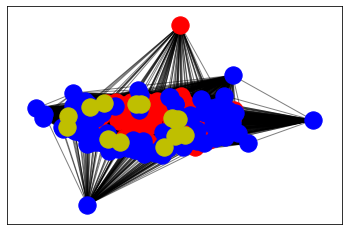

In [88]:
layout = nx.spring_layout(weight_proj_B)
commB=louvain_communities(weight_proj_B, weight='weight')
# 1st community
nx.draw_networkx_nodes(weight_proj_B, layout, nodelist=commB[0],
                       node_color='r')
# 2nd community
nx.draw_networkx_nodes(weight_proj_B, layout, nodelist=commB[1],
                       node_color='b')
# 2nd community
nx.draw_networkx_nodes(weight_proj_B, layout, nodelist=commB[2],
                       node_color='y')
# draw edges
nx.draw_networkx_edges(weight_proj_B, layout, width=1.0, alpha=0.5)

In [89]:
weighted_deg=G.degree(nbunch=comm[0], weight='weight')
w_series=pd.Series(dict(weighted_deg))
WDegNx=w_series.to_frame(name="weight_deg")
WDegNx.to_csv('../csv/weight_comm0_1970.csv')
WDegNx.sort_values(by="weight_deg", ascending=False).head(n=10)


weight_deg
USA  4.954520e+06
RUS  1.624575e+06
CHN  1.606950e+06
DEU  1.096970e+06
JPN  8.739406e+05
IND  7.610924e+05
GBR  6.880078e+05
UKR  5.152318e+05
FRA  5.126641e+05
CAN  4.129747e+05

In [90]:
weighted_deg=G.degree(nbunch=comm[1], weight='weight')
w_series=pd.Series(dict(weighted_deg))
WDegNx=w_series.to_frame(name="weight_deg")
WDegNx.to_csv('../csv/weight_comm1_1970.csv')
WDegNx.sort_values(by="weight_deg", ascending=False).head(n=10)

weight_deg
LBY  39730.595409
SDN  21759.574270
DOM  15259.058130
SLV   9201.914953
HTI   8172.680962
TTO   6901.907314
NIC   6401.770586
MUS   5997.215080
LBN   5819.732042
CRI   5094.356829

In [91]:
weighted_deg=G.degree(nbunch=comm[2], weight='weight')
w_series=pd.Series(dict(weighted_deg))
WDegNx=w_series.to_frame(name="weight_deg")
WDegNx.to_csv('../csv/weight_comm2_1970.csv')
WDegNx.sort_values(by="weight_deg", ascending=False).head(n=10)

weight_deg
AIR  169300.996600
SAU   47222.235553
KWT   38382.164655
MOZ   24200.035990
IRQ   24154.889335
UGA   20971.194415
AGO   20393.274067
ARE   19437.564129
NPL   18912.123269
TZA   17868.362120

In [42]:
import matplotlib.pyplot as plt
# rename Unnamed: 0
df1 = pd.read_csv('../csv/weight_comm0_1970.csv')
df2 = pd.read_csv('../csv/weight_comm1_1970.csv')
df3 = pd.read_csv('../csv/weight_comm2_1970.csv')


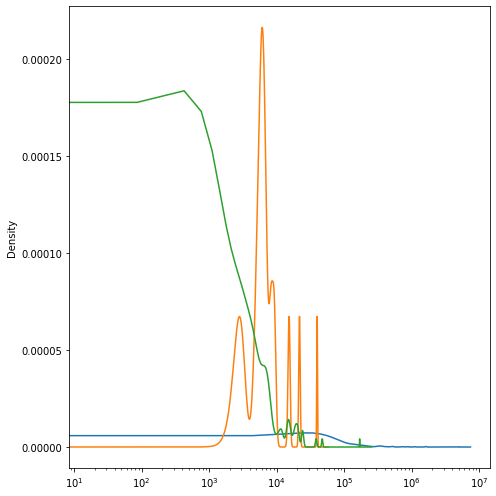

In [43]:
plt.rcParams["figure.figsize"] = [7, 7]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
df1['weight_deg'].plot( kind='kde', ax=ax, logx=True, bw_method=0.05)
df2['weight_deg'].plot( kind='kde', ax=ax, logx=True, bw_method=0.05)
df3['weight_deg'].plot( kind='kde', ax=ax, logx=True, bw_method=0.05)

plt.show()

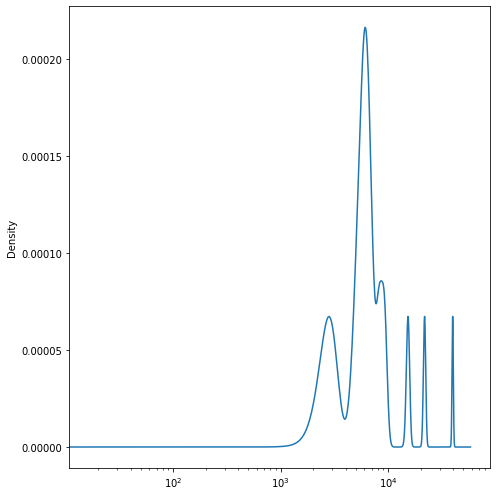

In [114]:
plt.rcParams["figure.figsize"] = [7, 7]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
df2['weight_deg'].plot( kind='kde', ax=ax, logx=True, bw_method=0.05)

plt.show()

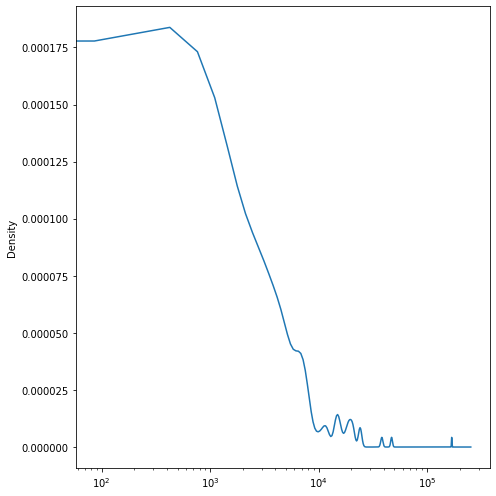

In [115]:
plt.rcParams["figure.figsize"] = [7, 7]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
df3['weight_deg'].plot( kind='kde', ax=ax, logx=True, bw_method=0.05)

plt.show()

In [123]:
lap=laplacian_centrality(G, nodelist=list(comm[0]),weight="weight")
w_series=pd.Series(dict(lap))
WDegNx=w_series.to_frame(name="lapl_centr")
WDegNx.to_csv('../csv/lapl_comm1_1970.csv')
WDegNx.sort_values(by="lapl_centr", ascending=False).head(n=10)

lapl_centr
USA    0.541067
CHN    0.146586
RUS    0.119443
DEU    0.081275
JPN    0.059371
IND    0.056559
GBR    0.047003
FRA    0.035299
UKR    0.031006
CAN    0.026223

In [124]:
lap=laplacian_centrality(G, nodelist=list(comm[1]),weight="weight")
w_series=pd.Series(dict(lap))
WDegNx2=w_series.to_frame(name="lapl_centr")
WDegNx2.to_csv('../csv/lapl_comm2_1970.csv')
WDegNx2.sort_values(by="lapl_centr", ascending=False).head(n=10)

lapl_centr
SDN    0.001552
DOM    0.001065
SLV    0.000669
HTI    0.000593
MUS    0.000487
NIC    0.000441
LBY    0.000419
CRI    0.000335
LBN    0.000323
TTO    0.000169

In [125]:
lap=laplacian_centrality(G, nodelist=list(comm[2]),weight="weight")
w_series=pd.Series(dict(lap))
WDegNx3=w_series.to_frame(name="lapl_centr")
WDegNx3.to_csv('../csv/lapl_comm3_1970.csv')
WDegNx3.sort_values(by="lapl_centr", ascending=False).head(n=10)

lapl_centr
MOZ    0.001867
UGA    0.001615
AIR    0.001502
NPL    0.001416
TZA    0.001298
LKA    0.001050
AGO    0.000959
CMR    0.000866
JAM    0.000819
GIN    0.000758

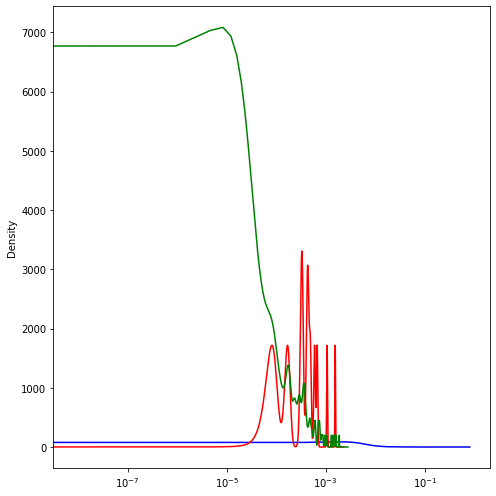

In [127]:
plt.rcParams["figure.figsize"] = [7, 7]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
WDegNx['lapl_centr'].plot(kind='kde', ax=ax, logx=True, bw_method=0.05, color='blue')
WDegNx2['lapl_centr'].plot(kind='kde', ax=ax, logx=True, bw_method=0.05, color='red')

WDegNx3['lapl_centr'].plot(kind='kde', ax=ax, logx=True, bw_method=0.05, color='green')


plt.show()